In [1]:
from importlib import reload
import utils; reload(utils)
from utils import *

Using cuDNN version 5105 on context None
Preallocating 2867/4095 Mb (0.700000) on cuda0
Mapped name None to device cuda0: GeForce GTX 650 (0000:01:00.0)
Using Theano backend.


In [2]:
%matplotlib inline
import os, random
from shutil import copytree
# data_path =  '/Volumes/Backups/data/LUNA16/patches/50x50/'
data_path =  '/Volumes/Backups/data/LUNA16/patches/'

In [3]:
theano.config.dnn.conv.precision = 'float32'
print(theano.config.dnn.conv.precision)

float32


In [4]:
#for i in range(5):
#    patches1 = random.choice(os.listdir("/Volumes/Backups/data/LUNA16/patches/patches1/"))
#    patches0 = random.choice(os.listdir("/Volumes/Backups/data/LUNA16/patches/patches0/"))
#    try:
#        copytree(data_path + 'patches1/' + patches1, '/Volumes/Backups/data/LUNA16/patches/sample2/patches1/' + patches1)
#    except FileExistsError:
#        continue
#    try:
#        copytree(data_path + 'patches0/' + patches0, '/Volumes/Backups/data/LUNA16/patches/sample2/patches0/' + patches0)
#    except FileExistsError:
#        continue

In [5]:
import numpy as np
np.set_printoptions(precision=4,linewidth=100)
import pandas as pd

In [6]:
from skimage import color

In [27]:
data_path # /Volumes/Backups/data/LUNA16/patches/224x224/patches1/

'/Volumes/Backups/data/LUNA16/patches/'

## Import data

### Double array aside

In [151]:
x=np.array([[1,2,3],[4,5,6],[7,8,9]])

In [152]:
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [155]:
x.flatten().repeat(2).reshape(3,6).repeat(2,axis=0)

array([[1, 1, 2, 2, 3, 3],
       [1, 1, 2, 2, 3, 3],
       [4, 4, 5, 5, 6, 6],
       [4, 4, 5, 5, 6, 6],
       [7, 7, 8, 8, 9, 9],
       [7, 7, 8, 8, 9, 9]])

### Now import data

In [163]:
import glob2
from skimage import color
image_labels = []

# input_path = data_path + "224x224/"
# img_size = 224

input_path = data_path + "100x100/"
img_size = 100

ctr = 0
for filename in (os.listdir(input_path)):
    print(filename)
    for image in  glob2.glob(input_path + filename+'/*'):
        ctr += 1
img_array = np.zeros((ctr,3,2*img_size,2*img_size),dtype=np.float32)
# img_array = np.zeros((ctr,3,50,50),dtype=np.float32)


i=0
nKind = 0
#for filename in glob2.glob(data_path+'sample/*/*'):
for filename in (os.listdir(input_path)):
    print(filename)
    for image_name in  glob2.glob(input_path + filename+'/*'):
#         print(image_name)
        if (filename == 'patches0'):
            image_labels.append(np.int16(0.0))
        else:
            image_labels.append(np.int16(1.0))
        x = load_array(image_name).astype(np.float32)
        print(x.shape)
        img = color.gray2rgb(x.flatten().repeat(2).reshape(img_size,2*img_size).repeat(2,axis=0))
        print(img.shape)
        img_array[i] = np.transpose(img,(2,0,1))
        i += 1
#         print(i)
        if i >= 30 + nKind:
            nKind = 30
            break



patches0
patches1
patches0
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
patches1
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(200, 200, 3)
(100, 100)
(20

In [164]:
img_array = img_array[:4351]

In [165]:
img_array.nbytes

2088480000

In [166]:
img_array.shape

(4351, 3, 200, 200)

In [167]:
img_array[0,0]

array([[   2.1857,    2.1857,    4.9179, ...,  197.625 ,  183.0536,  183.0536],
       [   2.1857,    2.1857,    4.9179, ...,  197.625 ,  183.0536,  183.0536],
       [  13.4786,   13.4786,   14.5714, ...,  195.2571,  179.9571,  179.9571],
       ..., 
       [ 255.    ,  255.    ,  255.    , ...,  150.45  ,  144.075 ,  144.075 ],
       [ 255.    ,  255.    ,  255.    , ...,  151.725 ,  153.7286,  153.7286],
       [ 255.    ,  255.    ,  255.    , ...,  151.725 ,  153.7286,  153.7286]], dtype=float32)

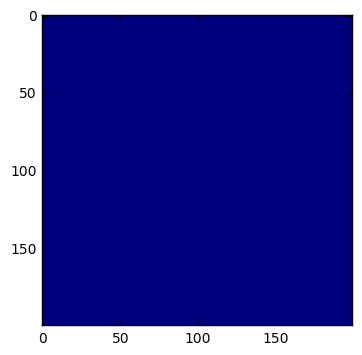

In [168]:
for img in img_array[4350:4351]:
    plt.figure
    plt.imshow(img[0], vmin=0, vmax=255)

In [94]:
img_array[0]

array([[[ 132.6   ,  130.9607,  132.0536, ...,  194.1643,  184.875 ,  174.8571],
        [ 129.8679,  132.9643,  139.8857, ...,  190.5214,  182.325 ,  173.7643],
        [ 123.3107,  129.5036,  145.8964, ...,  190.8857,  180.8679,  169.2107],
        ..., 
        [ 190.7036,  188.5179,  189.6107, ...,   10.3821,    5.1   ,    6.0107],
        [ 185.0571,  182.325 ,  183.4179, ...,    9.8357,    4.9179,    0.3643],
        [ 176.6786,  175.4036,  176.3143, ...,   10.9286,   10.2   ,    5.2821]],

       [[ 132.6   ,  130.9607,  132.0536, ...,  194.1643,  184.875 ,  174.8571],
        [ 129.8679,  132.9643,  139.8857, ...,  190.5214,  182.325 ,  173.7643],
        [ 123.3107,  129.5036,  145.8964, ...,  190.8857,  180.8679,  169.2107],
        ..., 
        [ 190.7036,  188.5179,  189.6107, ...,   10.3821,    5.1   ,    6.0107],
        [ 185.0571,  182.325 ,  183.4179, ...,    9.8357,    4.9179,    0.3643],
        [ 176.6786,  175.4036,  176.3143, ...,   10.9286,   10.2   ,    5.2821]

In [95]:
 img_array.shape

(4351, 3, 224, 224)

In [96]:
img.shape

(3, 224, 224)

In [97]:
len(image_labels)

4351

In [98]:
ohe_image_labels = to_categorical(np.array(np.float32(image_labels))).astype(np.float32)

In [99]:
sum(ohe_image_labels) # [0,1], [healthy, sick]

array([ 3000.,  1351.], dtype=float32)

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
trn_labels, val_labels = train_test_split(ohe_image_labels, test_size=0.2, random_state=42)

In [102]:
trn,val = train_test_split(img_array, test_size=0.2, random_state=42,)

In [103]:
trn.shape, val.shape

((3480, 3, 224, 224), (871, 3, 224, 224))

## Set up ResNet50 cnn model

In [104]:
# import resnet50; reload(resnet50)
# from resnet50 import Resnet50

In [29]:
from keras.applications.resnet50 import ResNet50

In [128]:
rn1 = keras.applications.ResNet50(include_top=False, input_shape=(3,224,224))

In [52]:
rn1.output_shape

(None, 2048, 1, 1)

In [53]:
rn1.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_4 (InputLayer)             (None, 3, 224, 224)   0                                            
____________________________________________________________________________________________________
zeropadding2d_4 (ZeroPadding2D)  (None, 3, 230, 230)   0           input_4[0][0]                    
____________________________________________________________________________________________________
conv1 (Convolution2D)            (None, 64, 112, 112)  9472        zeropadding2d_4[0][0]            
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 64, 112, 112)  256         conv1[0][0]                      
___________________________________________________________________________________________

In [105]:
val_features = rn1.predict(val)

In [106]:
val_features.shape

(871, 2048, 1, 1)

In [107]:
%time trn_features = rn1.predict(trn)

CPU times: user 2min 22s, sys: 474 ms, total: 2min 23s
Wall time: 2min 23s


In [108]:
trn_features.shape

(3480, 2048, 1, 1)

In [109]:
weights_dir = '/Volumes/Backups/data/LUNA16/weights'

In [110]:
save_array(weights_dir + 'val_rn1_conv.bc', val_features)

In [111]:
save_array(weights_dir + 'trn_rn1_conv.bc', trn_features)

## FC net

In [112]:
val_features = load_array(weights_dir + 'val_rn1_conv.bc')

In [113]:
val_features.shape

(871, 2048, 1, 1)

In [114]:
trn_features = load_array(weights_dir + 'trn_rn1_conv.bc')

In [115]:
trn_features.shape

(3480, 2048, 1, 1)

In [117]:
def get_fc_layers(nf, p):
    return [
#         MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]),
        BatchNormalization(axis=1, input_shape=rn1.output_shape[1:]),
        Flatten(),
        Dropout(p),
        Dense(nf, activation='relu'),
        BatchNormalization(),
        Dropout(p/2.),
        Dense(nf, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(2, activation='softmax'),
    ]


In [118]:
lrg_model = Sequential(get_fc_layers(512, 0.5))

In [119]:
lrg_model.input_shape, lrg_model.output_shape

((None, 2048, 1, 1), (None, 2))

In [120]:
lrg_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
batchnormalization_4 (BatchNorma (None, 2048, 1, 1)    8192        batchnormalization_input_2[0][0] 
____________________________________________________________________________________________________
flatten_2 (Flatten)              (None, 2048)          0           batchnormalization_4[0][0]       
____________________________________________________________________________________________________
dropout_4 (Dropout)              (None, 2048)          0           flatten_2[0][0]                  
____________________________________________________________________________________________________
dense_4 (Dense)                  (None, 512)           1049088     dropout_4[0][0]                  
___________________________________________________________________________________________

In [121]:
lrg_model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [122]:
lrg_model.fit(trn_features, trn_labels, batch_size=8, nb_epoch=1, 
              validation_data=(val_features, val_labels))

Train on 3480 samples, validate on 871 samples
Epoch 1/1
3480/3480 [==============================] - 4s - loss: 0.9541 - acc: 0.6190 - val_loss: 0.6167 - val_acc: 0.7061

In [123]:
lrg_model.fit(trn_features, trn_labels, batch_size=8, nb_epoch=3, 
              validation_data=(val_features, val_labels))

Train on 3480 samples, validate on 871 samples
Epoch 1/3
3480/3480 [==============================] - 4s - loss: 0.6496 - acc: 0.6744 - val_loss: 0.5968 - val_acc: 0.6969

In [124]:
lrg_model.fit(trn_features, trn_labels, batch_size=8, nb_epoch=3, 
              validation_data=(val_features, val_labels))

Train on 3480 samples, validate on 871 samples
Epoch 1/3
3480/3480 [==============================] - 4s - loss: 0.5597 - acc: 0.7233 - val_loss: 0.5724 - val_acc: 0.7187

In [125]:
lrg_model.fit(trn_features, trn_labels, batch_size=8, nb_epoch=3, 
              validation_data=(val_features, val_labels))

Train on 3480 samples, validate on 871 samples
Epoch 1/3
3480/3480 [==============================] - 4s - loss: 0.5266 - acc: 0.7411 - val_loss: 0.5598 - val_acc: 0.7210

In [110]:
!du -d 1 -h /Volumes/Backups/data/kaggle2017/unlabeledslices/031b7ec4fe96a3b035a8196264a8c8c3/

676K	/Volumes/Backups/data/kaggle2017/unlabeledslices/031b7ec4fe96a3b035a8196264a8c8c3//031b7ec4fe96a3b035a8196264a8c8c3_0x512x512.bc
704K	/Volumes/Backups/data/kaggle2017/unlabeledslices/031b7ec4fe96a3b035a8196264a8c8c3//031b7ec4fe96a3b035a8196264a8c8c3_100x512x512.bc
700K	/Volumes/Backups/data/kaggle2017/unlabeledslices/031b7ec4fe96a3b035a8196264a8c8c3//031b7ec4fe96a3b035a8196264a8c8c3_101x512x512.bc
700K	/Volumes/Backups/data/kaggle2017/unlabeledslices/031b7ec4fe96a3b035a8196264a8c8c3//031b7ec4fe96a3b035a8196264a8c8c3_102x512x512.bc
700K	/Volumes/Backups/data/kaggle2017/unlabeledslices/031b7ec4fe96a3b035a8196264a8c8c3//031b7ec4fe96a3b035a8196264a8c8c3_103x512x512.bc
704K	/Volumes/Backups/data/kaggle2017/unlabeledslices/031b7ec4fe96a3b035a8196264a8c8c3//031b7ec4fe96a3b035a8196264a8c8c3_104x512x512.bc
700K	/Volumes/Backups/data/kaggle2017/unlabeledslices/031b7ec4fe96a3b035a8196264a8c8c3//031b7ec4fe96a3b035a8196264a8c8c3_105x512x512.bc
696K	/Volumes/Backups/data/kaggle2017/unlabeledsli

In [ ]:
unresArr198 = load_array('/Volumes/Backups/data/unlabeled_patient_collapsed_images-198x3x224x224.bc')

In [ ]:
unlabeledPredictionvgg = lrg_model.predict(unresArr198, batch_size=8, verbose=1)

In [ ]:
#conv_feat = load_array(data_root + 'results/conv_feat.dat')
#conv_val_feat = load_array(data_root + 'results/conv_val_feat.dat')

In [165]:
theano.config.optimizer_verbose = False
print(theano.config.optimizer_verbose)

False


In [167]:
len(img_array)

3358

In [98]:
!git add cnnvggF.ipynb

In [99]:
!git commit -m "VggBN100x100 + Jeremy Howard 512 dense fc model on 4351 (1351+3000) 100x100 images, dropout=0.7"

[master 10a26e4] VggBN100x100 + Jeremy Howard 512 dense fc model on 4351 (1351+3000) 100x100 images, dropout=0.7
 1 file changed, 78 insertions(+), 120 deletions(-)


In [100]:
!git push origin master

X11 forwarding request failed on channel 0
Counting objects: 3, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 1.52 KiB | 0 bytes/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To git@github.com:ungsur/luna16.git
   edef942..10a26e4  master -> master


In [12]:
!ls -lh /Volumes/Backups/data/LUNA16/patches/224x224/patches1/ | wc -l

    1352
